In [232]:
import numpy as np
import pandas as pd

In [233]:
dataset = pd.read_csv('Salary_Data.csv')

In [234]:
dataset_1 = dataset[['Education Level', 'Job Title', 'Years of Experience', 'Salary']].dropna()

In [235]:
dataset_1.head()

,Education Level,Job Title,Years of Experience,Salary
0,Bachelor's,Software Engineer,5.0,90000.0
1,Master's,Data Analyst,3.0,65000.0
2,PhD,Senior Manager,15.0,150000.0
3,Bachelor's,Sales Associate,7.0,60000.0
4,Master's,Director,20.0,200000.0


In [236]:
dataset_1.tail()

,Education Level,Job Title,Years of Experience,Salary
6699,PhD,Director of Marketing,20.0,200000.0
6700,High School,Sales Associate,3.0,50000.0
6701,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,Master's Degree,Marketing Manager,14.0,140000.0
6703,High School,Sales Executive,1.0,35000.0


In [237]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [238]:
unique_education_levels = dataset_1['Education Level'].unique()
unique_job_titles = dataset_1['Job Title'].unique()
print("Unique Education Levels:", unique_education_levels)
print("Unique Job Titles:", unique_job_titles)

Unique Education Levels: ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Unique Job Titles: ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Directo

In [239]:
def normalize_education(level):
    level = level.lower().strip()
    if level in ['bachelors', "bachelor's degree", "bachelor's"]:
        return 'Bachelors'
    elif level in ['masters', "master's degree", "master's"]:
        return 'Masters'
    elif 'phd' in level:
        return 'PhD'
    else:
        return level

In [240]:
dataset_1['Education Level'] = dataset_1['Education Level'].apply(normalize_education)

In [241]:
def normalize_job_title(title):
    title = title.lower().strip()
    if 'software engineer' in title:
        return 'Software Engineer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'manager' in title:
        return 'Manager'
    elif 'developer' in title:
        return 'Developer'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'consultant' in title:
        return 'Consultant'
    else:
        return 'Other'

dataset_1['Job Title'] = dataset_1['Job Title'].apply(normalize_job_title)

In [242]:
education_mapping = {value: idx for idx, value in enumerate(dataset_1['Education Level'].unique())}
job_mapping = {value: idx for idx, value in enumerate(dataset_1['Job Title'].unique())}

dataset_1['Education Level'] = dataset_1['Education Level'].map(education_mapping)
dataset_1['Job Title'] = dataset_1['Job Title'].map(job_mapping)

In [243]:
print("Education Level Mapping:", education_mapping)
print("Job Title Mapping:", job_mapping)

Education Level Mapping: {'Bachelors': 0, 'Masters': 1, 'PhD': 2, 'high school': 3}
Job Title Mapping: {'Software Engineer': 0, 'Analyst': 1, 'Manager': 2, 'Other': 3, 'Developer': 4, 'Consultant': 5, 'Data Scientist': 6}


In [244]:
dataset_1

,Education Level,Job Title,Years of Experience,Salary
0,0,0,5.0,90000.0
1,1,1,3.0,65000.0
2,2,2,15.0,150000.0
3,0,3,7.0,60000.0
4,1,3,20.0,200000.0
...,...,...,...,...
6699,2,3,20.0,200000.0
6700,3,3,3.0,50000.0
6701,0,2,4.0,55000.0
6702,1,2,14.0,140000.0


In [245]:
from sklearn.preprocessing import LabelEncoder
label_encoder_edu = LabelEncoder()
label_encoder_job = LabelEncoder()
dataset_1['Education Level'] = label_encoder_edu.fit_transform(dataset_1['Education Level'])
dataset_1['Job Title'] = label_encoder_job.fit_transform(dataset_1['Job Title'])


In [246]:
X = dataset_1[['Education Level', 'Job Title', 'Years of Experience']]
y = dataset_1['Salary']

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [248]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [249]:
Y_pred = model.predict(X_test)

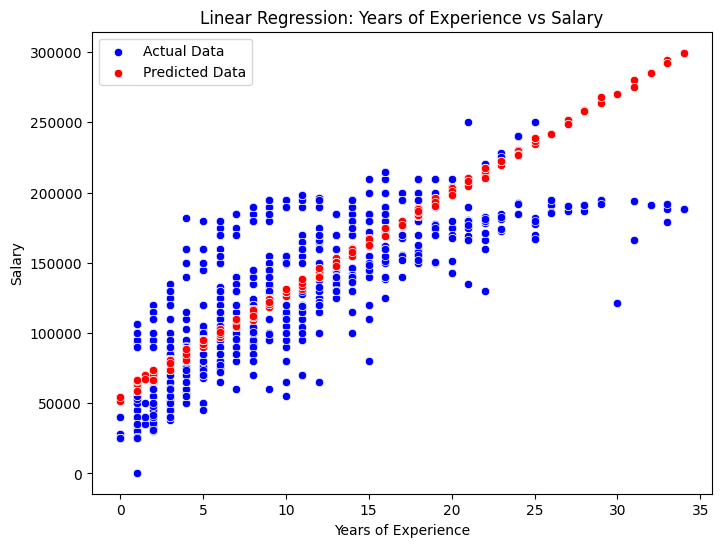

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Years of Experience'], y=y_test, color='blue', label='Actual Data')
sns.scatterplot(x=X_test['Years of Experience'], y=Y_pred, color='red', label='Predicted Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.legend()
plt.show()

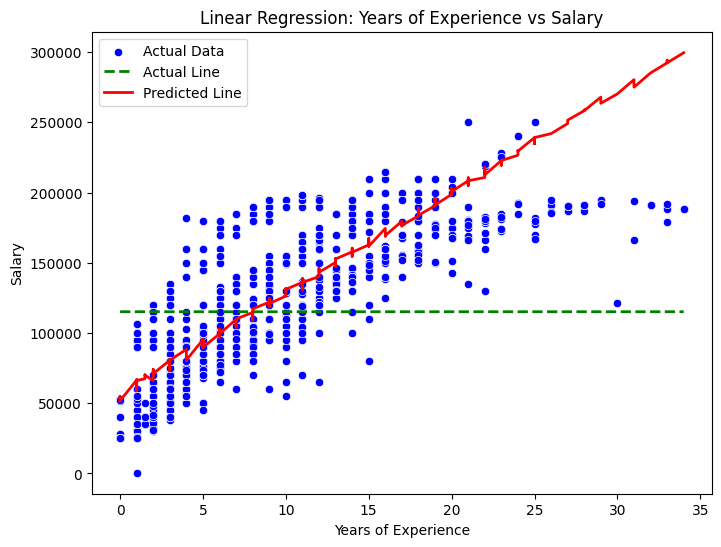

In [251]:
sorted_indices = np.argsort(X_test['Years of Experience'])
sorted_experience = np.array(X_test['Years of Experience'])[sorted_indices]
sorted_predictions = np.array(Y_pred)[sorted_indices]

mean_salary = np.mean(y_test)
straight_actual_line = np.full_like(sorted_experience, mean_salary)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Years of Experience'], y=y_test, color='blue', label='Actual Data')
plt.plot(sorted_experience, straight_actual_line, color='green', linewidth=2, linestyle='dashed', label='Actual Line')
plt.plot(sorted_experience, sorted_predictions, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.legend()
plt.show()

In [252]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 998758716.7176653
Root Mean Squared Error: 31603.144095448246
R-squared: 0.6481806668286949
